# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
import csv
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

file1 = open("../input/wine-quality-pred/train.csv")
file2 = open("../input/wine-quality-pred/test.csv")


ar = np.loadtxt(file1, delimiter=",", skiprows=1)
#print(ar[1][1])
newrow = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality","Id"]
bigarr = np.vstack([newrow,ar])
#print(bigarr)

train = pd.read_csv("../input/wine-quality-pred/train.csv")
test = pd.read_csv("../input/wine-quality-pred/test.csv")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Toutes nos variables sont quantitative ce qui nous facilite l'analyse statistique car nous n'avons pas besoin de les encoder.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         456 non-null    float64
 1   volatile acidity      456 non-null    float64
 2   citric acid           456 non-null    float64
 3   residual sugar        456 non-null    float64
 4   chlorides             456 non-null    float64
 5   free sulfur dioxide   456 non-null    float64
 6   total sulfur dioxide  456 non-null    float64
 7   density               456 non-null    float64
 8   pH                    456 non-null    float64
 9   sulphates             456 non-null    float64
 10  alcohol               456 non-null    float64
 11  Id                    456 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 42.9 KB


In [5]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,9
1,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,11
2,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,14
3,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,15
4,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,17


In [6]:
# Missing Values
print(train.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
# Missing Values
print(test.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Id                      0
dtype: int64


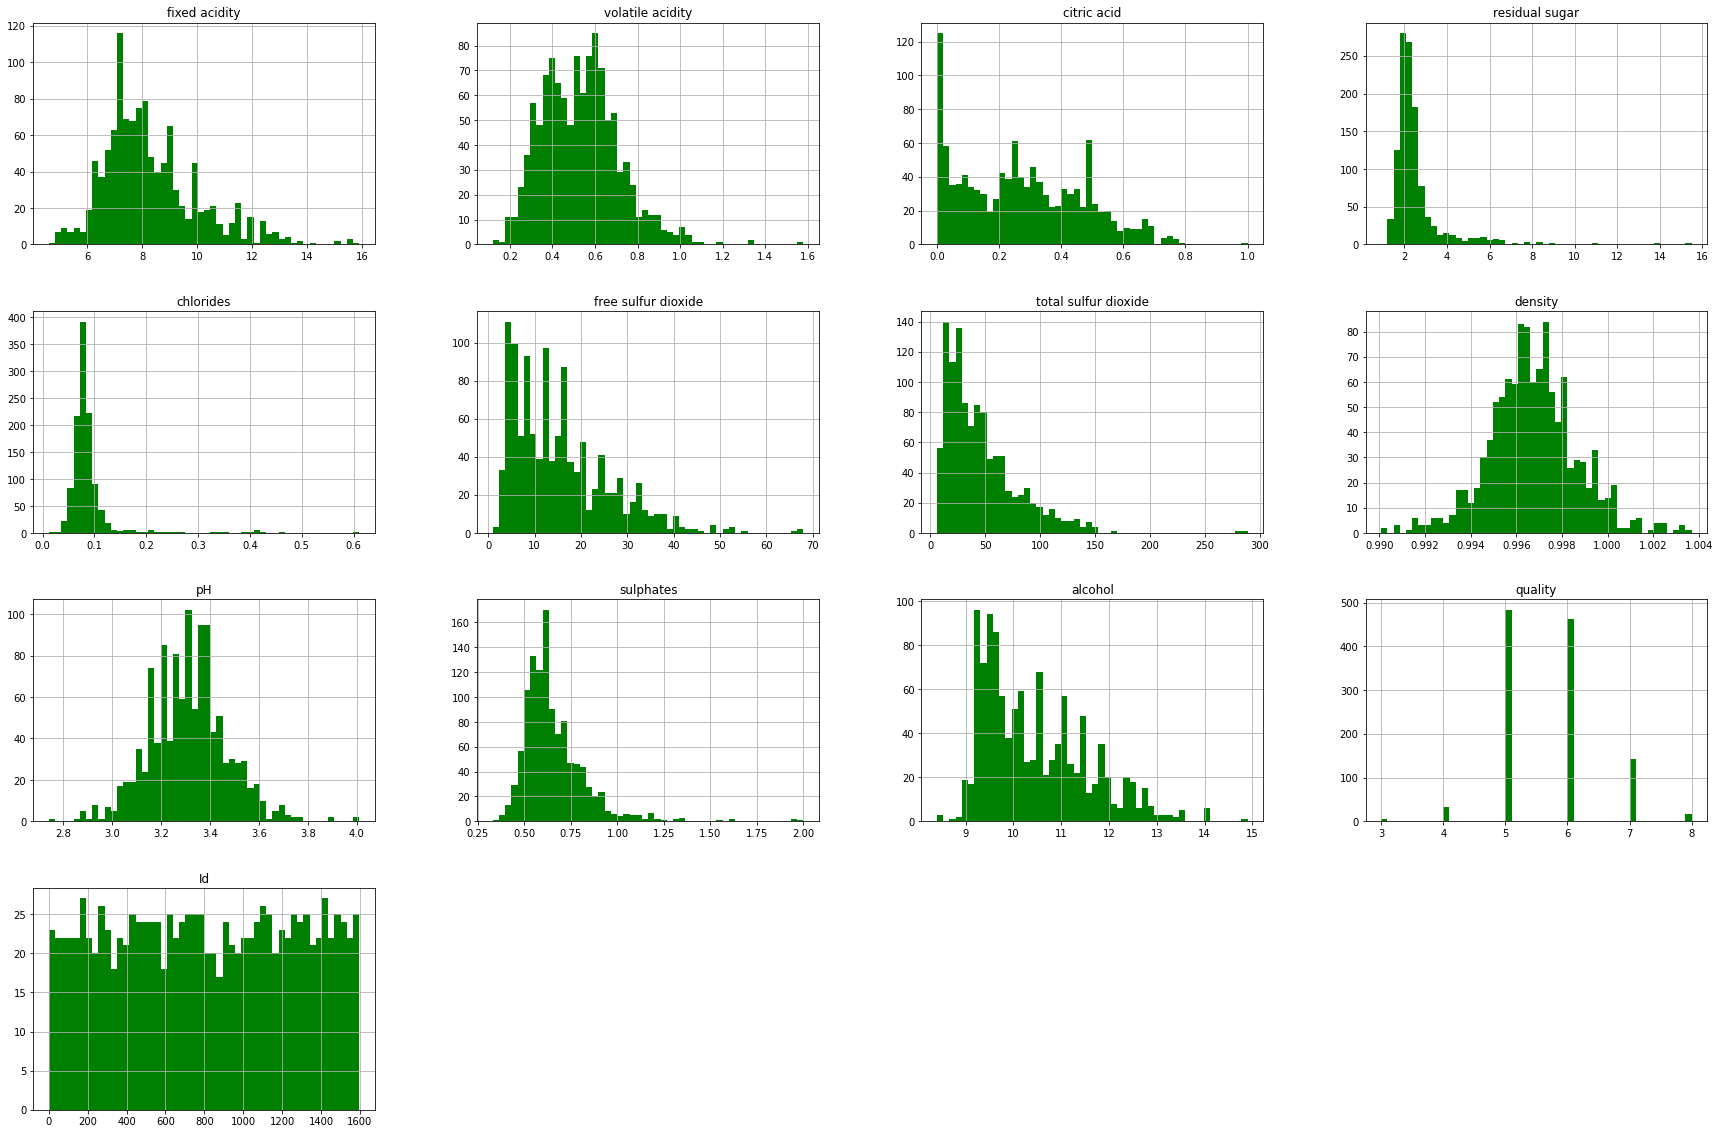

In [8]:
train.select_dtypes(np.number).hist(bins = 50,figsize =(30,20),color='green');

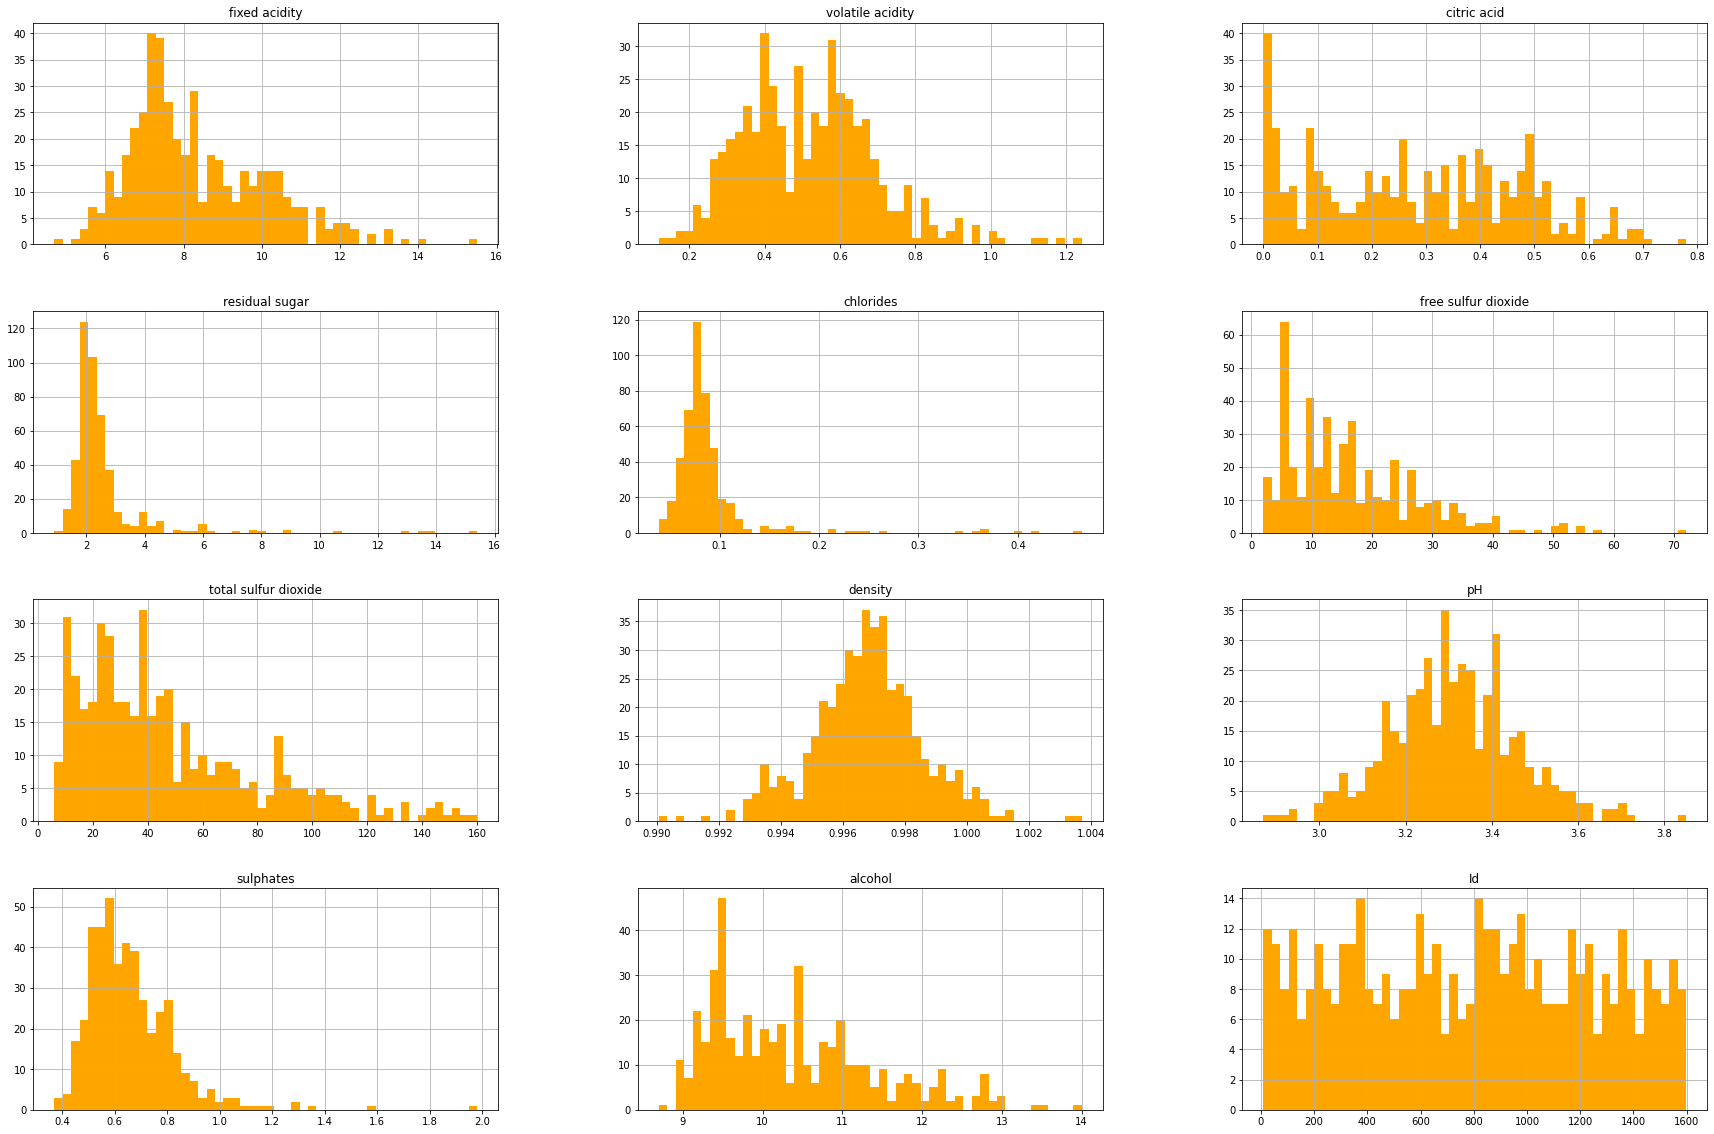

In [9]:
test.select_dtypes(np.number).hist(bins = 50,figsize =(30,20),color='orange');

In [10]:
corrmat = train.corr()
print(corrmat)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

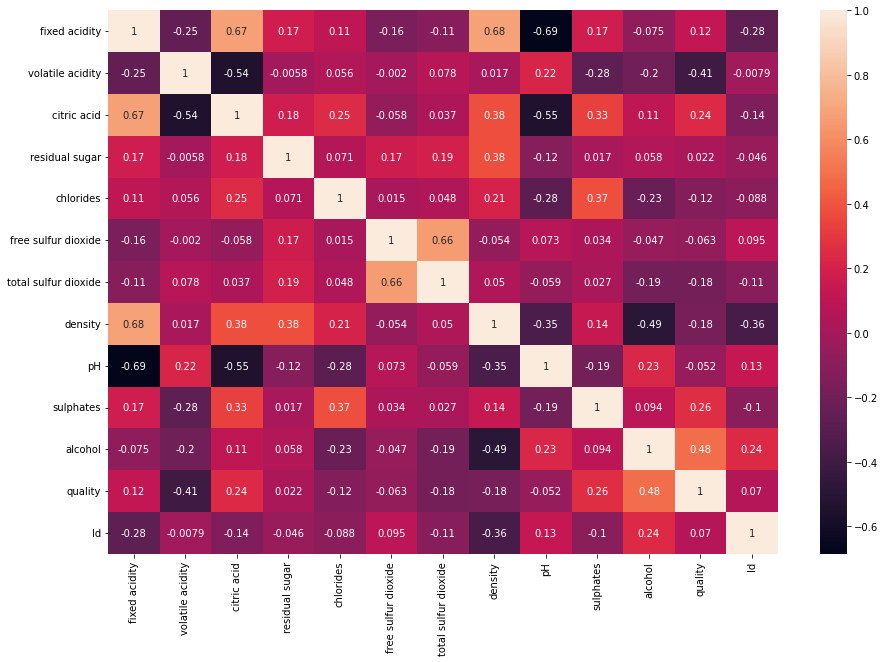

In [11]:
corrmat3 = train.corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(corrmat3, annot=True)
plt.show()

In [12]:

corrmat2 = corrmat["quality"].sort_values(ascending = False)
print(corrmat2)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


# **Classification**

In [13]:

train['goodquality'] = [1 if x >= 7 else 0 for x in train['quality']]

train['goodquality'].value_counts()


0    984
1    159
Name: goodquality, dtype: int64

In [14]:

X_train = train.drop(['quality','goodquality', 'Id'], axis = 1)
Y_train = train['quality']

X_test = test.drop(['Id'], axis = 1)

In [15]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [16]:
print(X_train.shape)

(1143, 11)


In [17]:
print(X_test.shape)

(456, 11)


Decision Tree Classifier

In [18]:

arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

In [19]:
arbreFirst.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

[Text(0.5622667910447762, 0.9545454545454546, 'alcohol <= 10.525\ngini = 0.641\nsamples = 1143\nvalue = [6, 33, 483, 462, 143, 16]'),
 Text(0.3353544776119403, 0.8636363636363636, 'sulphates <= 0.585\ngini = 0.543\nsamples = 698\nvalue = [5, 21, 408, 235, 27, 2]'),
 Text(0.1417910447761194, 0.7727272727272727, 'alcohol <= 9.75\ngini = 0.418\nsamples = 310\nvalue = [3, 11, 227, 65, 4, 0]'),
 Text(0.08955223880597014, 0.6818181818181818, 'free sulfur dioxide <= 26.5\ngini = 0.312\nsamples = 183\nvalue = [2, 8, 150, 22, 1, 0]'),
 Text(0.07462686567164178, 0.5909090909090909, 'total sulfur dioxide <= 36.5\ngini = 0.375\nsamples = 146\nvalue = [2, 8, 113, 22, 1, 0]'),
 Text(0.04477611940298507, 0.5, 'volatile acidity <= 0.725\ngini = 0.25\nsamples = 65\nvalue = [0, 4, 56, 4, 1, 0]'),
 Text(0.029850746268656716, 0.4090909090909091, 'citric acid <= 0.105\ngini = 0.15\nsamples = 50\nvalue = [0, 0, 46, 3, 1, 0]'),
 Text(0.014925373134328358, 0.3181818181818182, 'gini = 0.31\nsamples = 22\nvalue

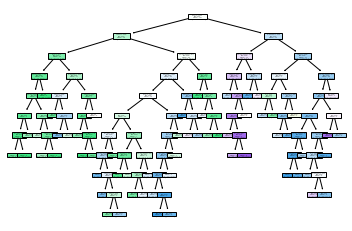

In [20]:
plot_tree(arbreFirst,feature_names = list(X_train),filled=True)

In [21]:

from sklearn.tree import export_text
tree_rules = export_text(arbreFirst,feature_names = list(X_train),show_weights=True)

print(tree_rules)

|--- alcohol <= 10.53
|   |--- sulphates <= 0.58
|   |   |--- alcohol <= 9.75
|   |   |   |--- free sulfur dioxide <= 26.50
|   |   |   |   |--- total sulfur dioxide <= 36.50
|   |   |   |   |   |--- volatile acidity <= 0.73
|   |   |   |   |   |   |--- citric acid <= 0.11
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 18.00, 3.00, 1.00, 0.00] class: 5
|   |   |   |   |   |   |--- citric acid >  0.11
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 28.00, 0.00, 0.00, 0.00] class: 5
|   |   |   |   |   |--- volatile acidity >  0.73
|   |   |   |   |   |   |--- weights: [0.00, 4.00, 10.00, 1.00, 0.00, 0.00] class: 5
|   |   |   |   |--- total sulfur dioxide >  36.50
|   |   |   |   |   |--- total sulfur dioxide <= 49.50
|   |   |   |   |   |   |--- weights: [2.00, 4.00, 13.00, 7.00, 0.00, 0.00] class: 5
|   |   |   |   |   |--- total sulfur dioxide >  49.50
|   |   |   |   |   |   |--- chlorides <= 0.08
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 19.00, 10.00, 0.

In [22]:
Arbre_pred = arbreFirst.predict(X_test)

In [23]:
submission_arbre = pd.concat([test.Id, pd.Series(Arbre_pred, name='quality')], axis=1)
submission_arbre

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,6
452,1588,7
453,1589,5
454,1596,6


In [24]:

submission_arbre['goodquality'] = [1 if x >= 7 else 0 for x in submission_arbre['quality']]
submission_arbre['goodquality'].value_counts()

0    397
1     59
Name: goodquality, dtype: int64

In [25]:

final_submission_arbre = submission_arbre.drop(['goodquality'], axis = 1)
final_submission_arbre.to_csv('./submission_arbre.csv', index=False, header=True)

Random Forest

In [26]:

forest_model = RandomForestRegressor(n_estimators=500, max_depth=10)
forest_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [27]:
random_forest_pred = forest_model.predict(X_test)

In [28]:

submission_forest = pd.concat([test.Id, pd.Series(random_forest_pred.astype(int), name='quality')], axis=1)
submission_forest

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,6
452,1588,6
453,1589,5
454,1596,6


In [29]:

submission_forest['goodquality'] = [1 if x >= 7 else 0 for x in submission_forest['quality']]
submission_forest['goodquality'].value_counts()

0    454
1      2
Name: goodquality, dtype: int64

In [30]:

final_submission_forest = submission_forest.drop(['goodquality'], axis = 1)
final_submission_forest.to_csv('./submission_forest.csv', index=False, header=True)

In [31]:

GBR_model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=4)
GBR_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000)

In [32]:
GBR_pred = GBR_model.predict(X_test)

In [33]:
submission_GBR = pd.concat([test.Id, pd.Series(GBR_pred.astype(int), name='quality')], axis=1)
submission_GBR

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,4
4,17,5
...,...,...
451,1585,6
452,1588,6
453,1589,5
454,1596,6


In [34]:

submission_GBR['goodquality'] = [1 if x >= 7 else 0 for x in submission_GBR['quality']]
submission_GBR['goodquality'].value_counts()

0    455
1      1
Name: goodquality, dtype: int64

In [35]:

final_submission_GBR = submission_GBR.drop(['goodquality'], axis = 1)
final_submission_GBR.to_csv('./submission_GRB.csv', index=False, header=True)

In [36]:
labelencoder = LabelEncoder()
Y_train_encoded = labelencoder.fit_transform(train["quality"])

In [37]:
XGBmodel = xgb.XGBClassifier(random_state=1,use_label_encoder=False)
XGBmodel.fit(X_train, Y_train_encoded)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [38]:
XGB_pred = XGBmodel.predict(X_test)+3

In [39]:
submission_XGB = pd.concat([test.Id, pd.Series(XGB_pred.astype(int), name='quality')], axis=1)
submission_XGB

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,7
452,1588,6
453,1589,5
454,1596,6


In [40]:

submission_XGB['goodquality'] = [1 if x >= 7 else 0 for x in submission_XGB['quality']]
submission_XGB['goodquality'].value_counts()

0    403
1     53
Name: goodquality, dtype: int64

In [41]:

final_submission_XGB = submission_XGB.drop(['goodquality'], axis = 1)
final_submission_XGB.to_csv('./submission_XGB.csv', index=False, header=True)

In [42]:

X_train_norm = StandardScaler().fit_transform(X_train)

X_test_norm = StandardScaler().fit_transform(X_test)


In [43]:
print(X_train_norm.shape)

(1143, 11)


In [44]:
print(X_test_norm.shape)

(456, 11)


Decision tree

In [45]:

arbreFirst_norm = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)
arbreFirst_norm.fit(X_train_norm,Y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

[Text(0.5622667910447762, 0.9545454545454546, '[-1.55201739  0.4659386  -1.36502663 -0.68777067  0.04375689  0.03752824\n  0.39933432 -1.26305989  1.71770648 -0.80850414 -0.50115589] <= 0.077\ngini = 0.641\nsamples = 1143\nvalue = [6, 33, 483, 462, 143, 16]'),
 Text(0.3353544776119403, 0.8636363636363636, '[-0.92230541  0.27101182 -0.9581086  -0.5402045   0.21308104 -0.06007081\n  0.58244098 -0.43155622 -0.19805723 -0.69108098 -1.14827218] <= -0.427\ngini = 0.543\nsamples = 698\nvalue = [5, 21, 408, 235, 27, 2]'),
 Text(0.1417910447761194, 0.7727272727272727, '[-1.55201739  0.4659386  -1.36502663 -0.68777067  0.04375689  0.03752824\n  0.39933432 -1.26305989  1.71770648 -0.80850414 -0.50115589] <= -0.64\ngini = 0.418\nsamples = 310\nvalue = [3, 11, 227, 65, 4, 0]'),
 Text(0.08955223880597014, 0.6818181818181818, '[-0.52157961  0.71655875 -1.36502663 -0.5402045  -0.25256038 -0.25526891\n -0.18050344  0.55585438  1.27069495 -0.57365783 -0.96338181] <= 1.062\ngini = 0.312\nsamples = 183\nv

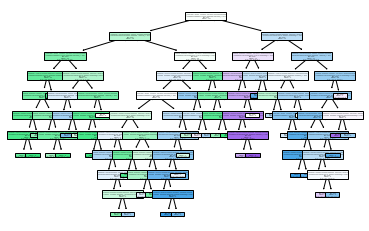

In [46]:
plot_tree(arbreFirst_norm,feature_names = list(X_train_norm),filled=True)

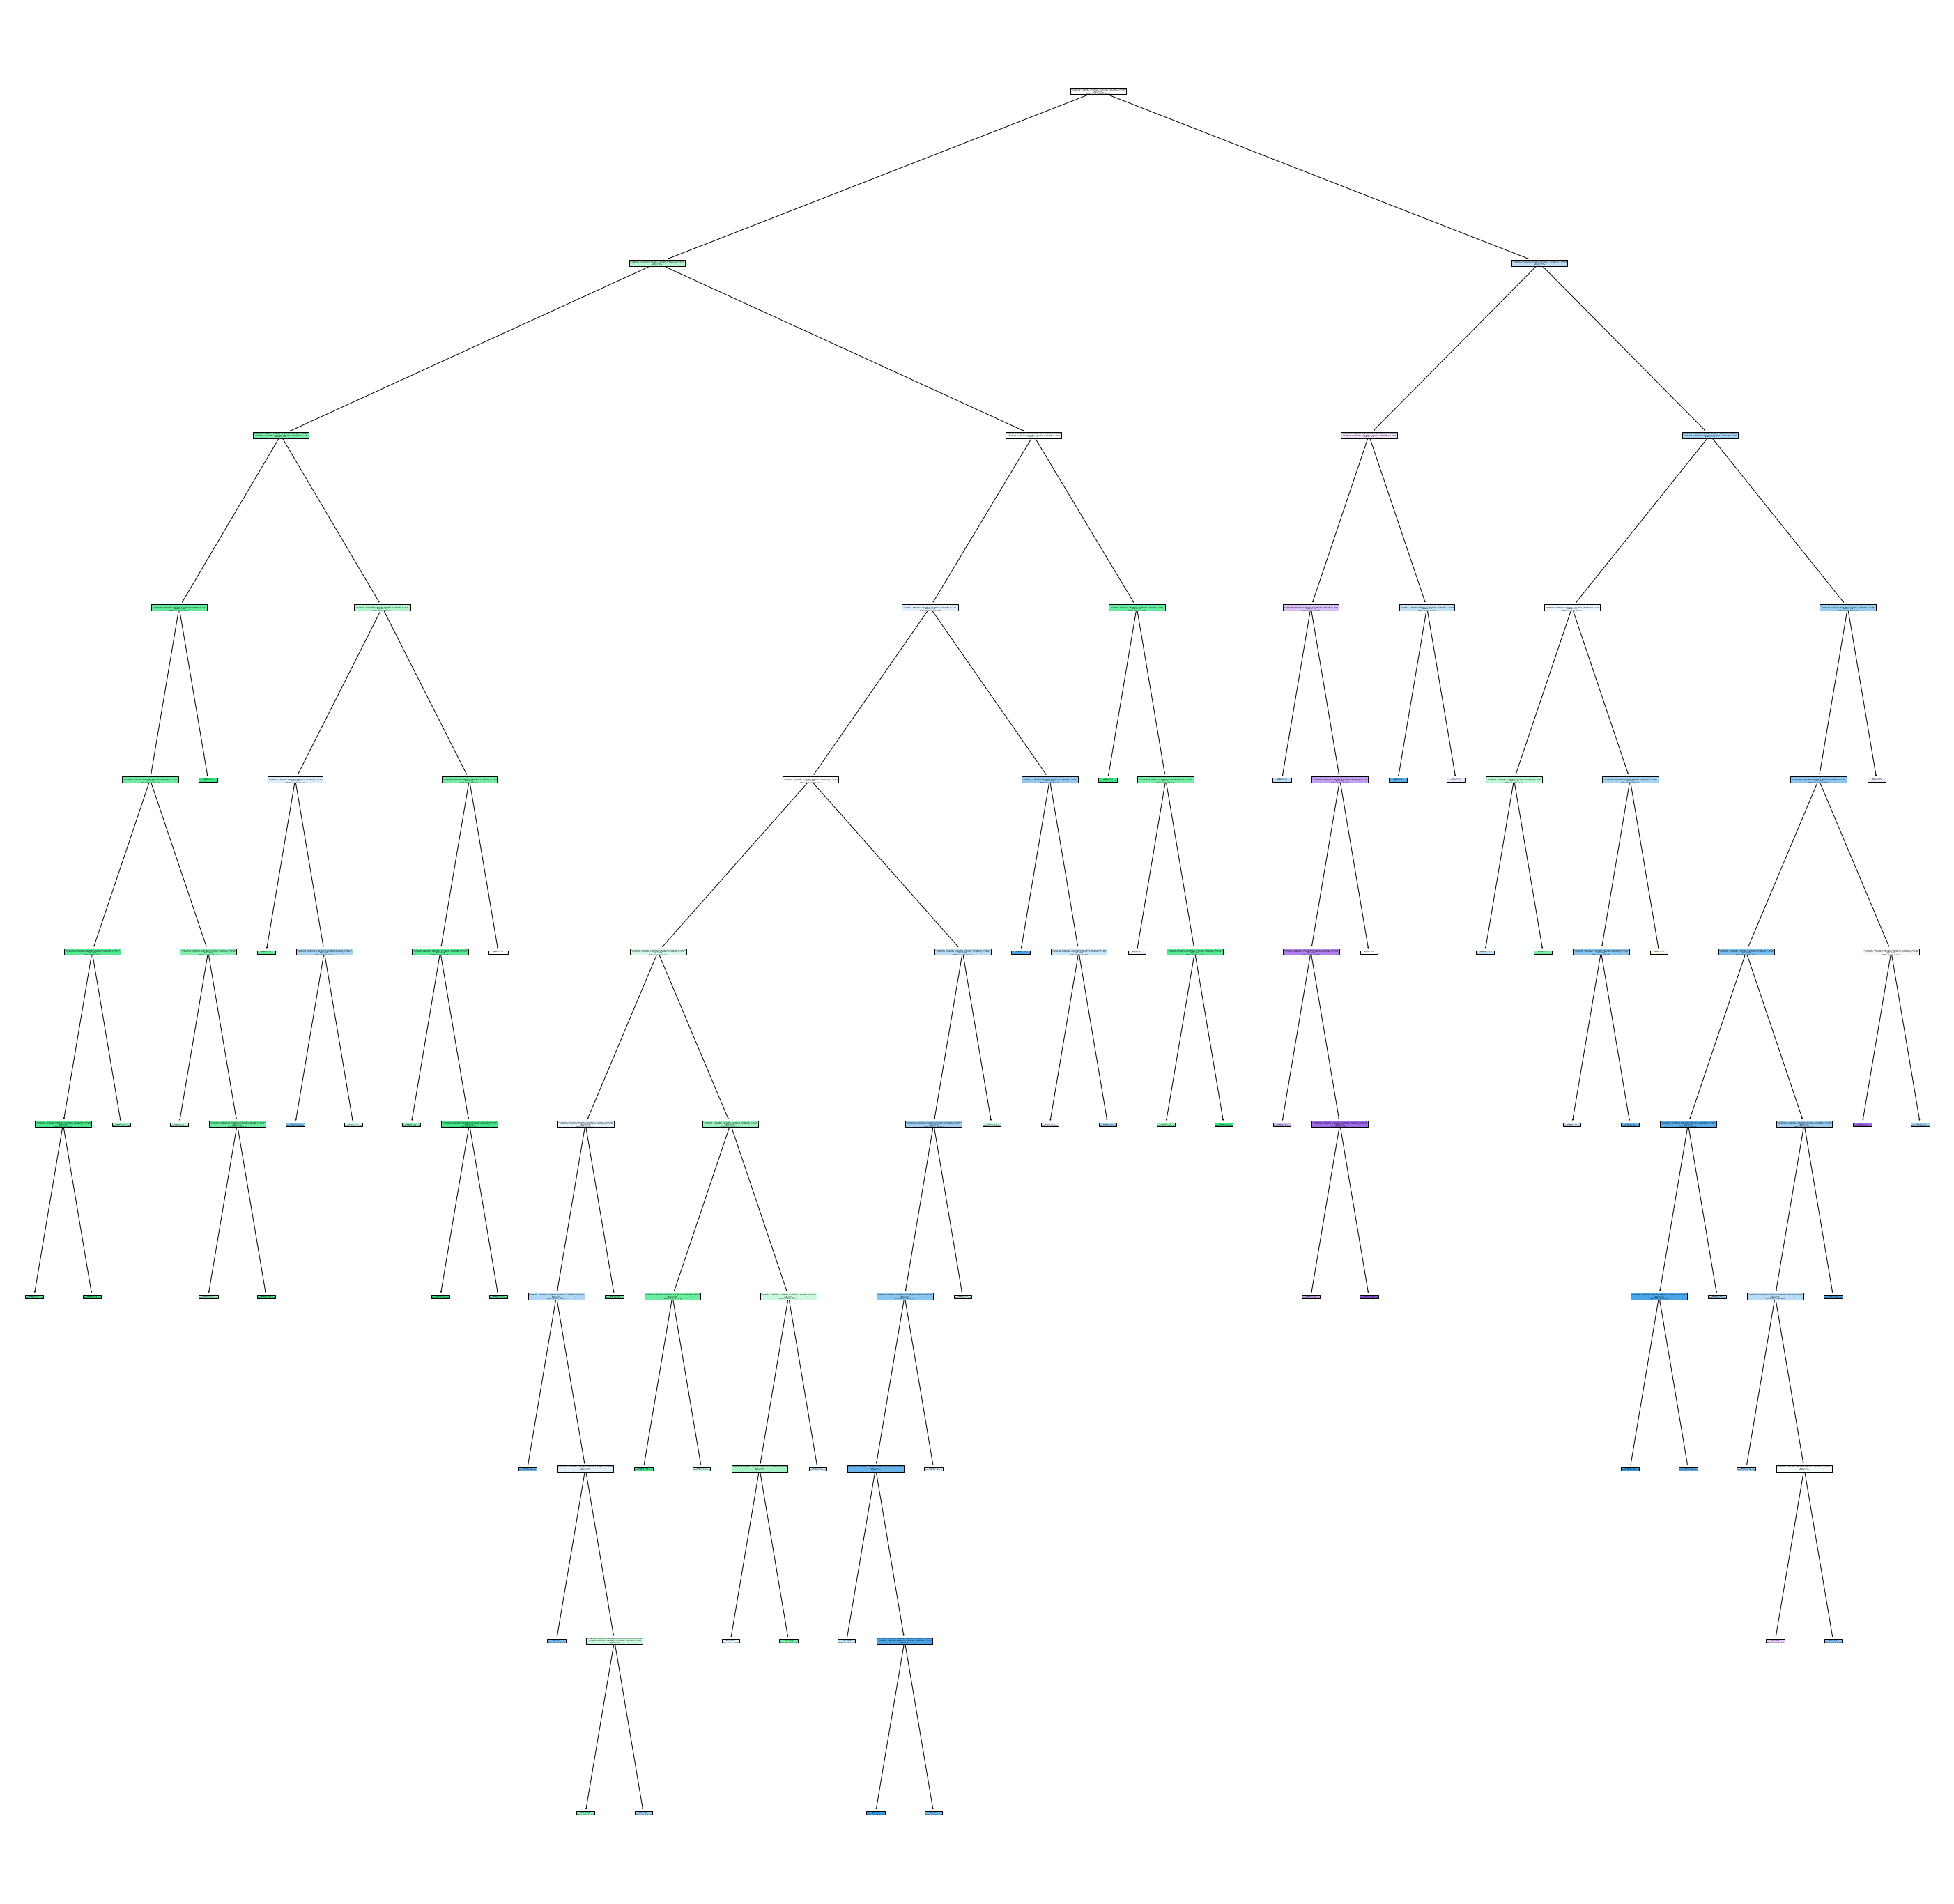

In [47]:
# Affichage plus grand 
plt.figure(figsize=(50,50))
plot_tree(arbreFirst_norm,feature_names = list(X_train_norm),filled=True) 
plt.show()

In [48]:
Arbre_pred_norm = arbreFirst_norm.predict(X_test_norm)

In [49]:
submission_arbre_norm = pd.concat([test.Id, pd.Series(Arbre_pred_norm, name='quality')], axis=1)
submission_arbre_norm

,Id,quality
0,9,7
1,11,7
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,6
452,1588,7
453,1589,5
454,1596,6


In [50]:

submission_arbre_norm ['goodquality'] = [1 if x >= 7 else 0 for x in submission_arbre_norm['quality']]
submission_arbre_norm['goodquality'].value_counts()

0    389
1     67
Name: goodquality, dtype: int64

In [51]:

final_submission_arbre_norm = submission_arbre_norm.drop(['goodquality'], axis = 1)
final_submission_arbre_norm.to_csv('./submission_arbre_norm.csv', index=False, header=True)

Random Forest

In [52]:

forest_model_norm = RandomForestRegressor(n_estimators=500, max_depth=10)
forest_model_norm.fit(X_train_norm, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [53]:
random_forest_pred_norm = forest_model_norm.predict(X_test_norm)

In [54]:

submission_forest_norm = pd.concat([test.Id, pd.Series(random_forest_pred_norm.astype(int), name='quality')], axis=1)
submission_forest_norm

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,6
452,1588,6
453,1589,5
454,1596,6


In [55]:

submission_forest_norm['goodquality'] = [1 if x >= 7 else 0 for x in submission_forest_norm['quality']]
submission_forest_norm['goodquality'].value_counts()

0    453
1      3
Name: goodquality, dtype: int64

In [56]:

final_submission_forest_norm = submission_forest_norm.drop(['goodquality'], axis = 1)
final_submission_forest_norm.to_csv('./submission_forest_norm.csv', index=False, header=True)

Gradient Boosting Regressor

In [57]:

GBR_model_norm = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=4)
GBR_model_norm.fit(X_train_norm, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000)

In [58]:
GBR_pred_norm = GBR_model_norm.predict(X_test_norm)

In [59]:
submission_GBR_norm = pd.concat([test.Id, pd.Series(GBR_pred_norm.astype(int), name='quality')], axis=1)
submission_GBR_norm

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,6
452,1588,6
453,1589,4
454,1596,6


In [60]:

submission_GBR_norm['goodquality'] = [1 if x >= 7 else 0 for x in submission_GBR_norm['quality']]
submission_GBR_norm['goodquality'].value_counts()

0    453
1      3
Name: goodquality, dtype: int64

In [61]:

final_submission_GBR_norm = submission_GBR_norm.drop(['goodquality'], axis = 1)
final_submission_GBR_norm.to_csv('./submission_GBR_norm.csv', index=False, header=True)

XG Boost

In [62]:
XGBmodel_norm = xgb.XGBClassifier(random_state=1)
XGBmodel_norm.fit(X_train_norm, Y_train_encoded)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [63]:
XGB_pred_norm = XGBmodel_norm.predict(X_test_norm)+3

In [64]:
submission_XGB_norm = pd.concat([test.Id, pd.Series(XGB_pred_norm.astype(int), name='quality')], axis=1)
submission_XGB_norm

,Id,quality
0,9,5
1,11,5
2,14,5
3,15,5
4,17,5
...,...,...
451,1585,7
452,1588,6
453,1589,5
454,1596,6


In [65]:

submission_XGB_norm['goodquality'] = [1 if x >= 7 else 0 for x in submission_XGB_norm['quality']]
submission_XGB_norm['goodquality'].value_counts()

0    403
1     53
Name: goodquality, dtype: int64

In [66]:
## Préparation pour soumission 
final_submission_XGB_norm = submission_XGB_norm.drop(['goodquality'], axis = 1)
final_submission_XGB_norm.to_csv('./submission_XGB_norm.csv', index=False, header=True)

# **Comparaison of performance**

In [67]:
print("Décision Tree")
print("Score = ", arbreFirst.score(X_train,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_arbre.quality), np.log(Arbre_pred),squared=False))
print("  ")
print("Random Forest")
print("Score = ", forest_model.score(X_train,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_forest.quality), np.log(random_forest_pred),squared=False))
print("  ")
print("Gradient Booster Regressor")
print("Score = ", GBR_model.score(X_train,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_GBR.quality), np.log(GBR_pred),squared=False))
print("  ")
print("XG Boost")
print("Score = ", XGBmodel.score(X_train,Y_train_encoded))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_XGB.quality), np.log(XGB_pred),squared=False))

Décision Tree
Score =  0.7069116360454943
Taux d'erreur = 0.0
  
Random Forest
Score =  0.8642593169497375
Taux d'erreur = 0.09474077349420694
  
Gradient Booster Regressor
Score =  0.7699403993377198
Taux d'erreur = 0.09896662768135303
  
XG Boost
Score =  1.0
Taux d'erreur = 0.0


In [68]:
print("Décision Tree (normalisé) ")
print("Score = ", arbreFirst_norm.score(X_train_norm,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_arbre_norm.quality), np.log(Arbre_pred_norm),squared=False))
print("  ")
print("Random Forest (normalisé)")
print("Score = ", forest_model_norm.score(X_train_norm,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_forest_norm.quality), np.log(random_forest_pred_norm),squared=False))
print("  ")
print("Gradient Booster Regressor (normalisé)")
print("Score = ", GBR_model_norm.score(X_train_norm,Y_train))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_GBR_norm.quality), np.log(GBR_pred_norm),squared=False))
print("  ")
print("XG Boost (normalisé)")
print("Score = ", XGBmodel_norm.score(X_train_norm,Y_train_encoded))
print("Taux d'erreur =", mean_squared_error(np.log(final_submission_XGB_norm.quality), np.log(XGB_pred_norm),squared=False))

Décision Tree (normalisé) 
Score =  0.7069116360454943
Taux d'erreur = 0.0
  
Random Forest (normalisé)
Score =  0.8631945004275391
Taux d'erreur = 0.0927110227318639
  
Gradient Booster Regressor (normalisé)
Score =  0.7699403993377198
Taux d'erreur = 0.10145007652000572
  
XG Boost (normalisé)
Score =  1.0
Taux d'erreur = 0.0


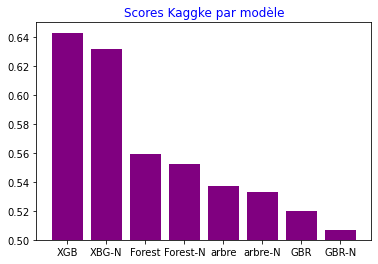

In [69]:
x = ['XGB','XBG-N','Forest','Forest-N','arbre','arbre-N','GBR','GBR-N']
y = [0.64254,0.63157,0.55921,0.55263,0.53728,0.53289,0.51973,0.50657]
plt.bar(x,y,color = 'purple')
plt.ylim(0.5,0.65)
plt.title("Scores Kaggke par modèle",color = 'blue')
plt.show ()

In [70]:
FINAL_submission = final_submission_XGB
FINAL_submission.to_csv('./submission.csv', index=False, header=True)